# Text Sentiment

Descargaremos noticias relacionadas al oro a través de Eikon News y luego analizaremos las noticias descargadas.

Importacion de modulos

In [1]:
import numpy as np
import eikon as ek
import pandas as pd
from bs4 import BeautifulSoup
import datetime
from datetime import time, timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from textblob import TextBlob
%matplotlib inline
import time

Ingreso de API Key

In [2]:
ek.set_app_key('Ingresar_Api_Key')

Creamos un vector de fechas desde 01/01/2020 al 01/04/2020

In [3]:
dates = np.arange('2020-01-01', '2020-04-01', dtype='datetime64[D]')


In [4]:
datesstr = np.datetime_as_string(dates)

In [5]:
print(datesstr)

['2020-01-01' '2020-01-02' '2020-01-03' '2020-01-04' '2020-01-05'
 '2020-01-06' '2020-01-07' '2020-01-08' '2020-01-09' '2020-01-10'
 '2020-01-11' '2020-01-12' '2020-01-13' '2020-01-14' '2020-01-15'
 '2020-01-16' '2020-01-17' '2020-01-18' '2020-01-19' '2020-01-20'
 '2020-01-21' '2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25'
 '2020-01-26' '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30'
 '2020-01-31' '2020-02-01' '2020-02-02' '2020-02-03' '2020-02-04'
 '2020-02-05' '2020-02-06' '2020-02-07' '2020-02-08' '2020-02-09'
 '2020-02-10' '2020-02-11' '2020-02-12' '2020-02-13' '2020-02-14'
 '2020-02-15' '2020-02-16' '2020-02-17' '2020-02-18' '2020-02-19'
 '2020-02-20' '2020-02-21' '2020-02-22' '2020-02-23' '2020-02-24'
 '2020-02-25' '2020-02-26' '2020-02-27' '2020-02-28' '2020-02-29'
 '2020-03-01' '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05'
 '2020-03-06' '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10'
 '2020-03-11' '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15'
 '2020-03-

Descarga de noticias

In [6]:
df = {}
for i in np.arange(0,len(datesstr)):
        df[i] = ek.get_news_headlines("R:GCc1 AND Language:LEN",
                                    date_from=datesstr[i] + str(" 00:00:00"),
                                    date_to=datesstr[i] + str(" 23:59:59"), count= 100)

In [7]:
df[1]

,versionCreated,text,storyId,sourceCode
2020-01-02 23:52:26.709,2020-01-02 23:52:26.709000+00:00,GGD GoGold Resources files Los Ricos technical...,urn:newsml:reuters.com:20200102:nNRAakob7i:1,NS:CNSWCH
2020-01-02 23:34:10.240,2020-01-02 23:34:10.240000+00:00,"SPDR Gold holdings up 0.23 pct, or 2.05 tonnes",urn:newsml:reuters.com:20200102:nAQN000EWJ:1,NS:RTRS
2020-01-02 23:34:10.208,2020-01-02 23:34:10.208000+00:00,SPDR GOLD TRUST <GLD> REPORTS HOLDINGS UP 0.23...,urn:newsml:reuters.com:20200102:nAQN000EWJ:1,NS:RTRS
2020-01-02 23:32:29.425,2020-01-02 23:32:29.425000+00:00,"NGT Newmont closes KCGM sale, revises guidance",urn:newsml:reuters.com:20200102:nNRAalczu4:1,NS:CNSWCH
2020-01-02 23:30:23.795,2020-01-02 23:30:23.795000+00:00,DJ Nymex/Comex Globex Metals Futures Hourly Pr...,urn:newsml:reuters.com:20200102:nDJR5g6qpw:1,NS:DJN
2020-01-02 23:22:03.473,2020-01-02 23:22:03.473000+00:00,Galleon Gold Raises USD0.76 Million in Private...,urn:newsml:reuters.com:20200102:nNRAald6nn:1,NS:DATMTR
2020-01-02 23:21:47.927,2020-01-02 23:21:47.927000+00:00,Manitou Gold Raises USD1.52 Million in Private...,urn:newsml:reuters.com:20200102:nNRAald90f:1,NS:DATMTR
2020-01-02 23:05:23.000,2020-01-02 23:15:42+00:00,CORRECTED-BUZZ-Newmont Goldcorp sees lower gol...,urn:newsml:reuters.com:20200102:nL4N2972KG:2,NS:RTRS
2020-01-02 22:54:54.000,2020-01-02 22:54:54+00:00,BRIEF-Newmont Completes Sale Of Interests In K...,urn:newsml:reuters.com:20200102:nASA0083J:1,NS:RTRS
2020-01-02 22:39:59.227,2020-01-02 22:39:59.227000+00:00,PLATTS: 312--Third Party Daily Gold Assessment...,urn:newsml:reuters.com:20200102:nPt7L3qDs:1,NS:PLTS


Concateno todos los dataframes en uno solo

In [8]:
for i in range(0,len(df)):
        df[i] = df[i].iloc[::-1]

In [9]:
news_df = pd.concat(df.values(), ignore_index=True)

In [11]:
news_df

,versionCreated,text,storyId,sourceCode
0,2020-01-01 00:30:20.248000+00:00,DJ Nymex/Comex Globex Metals Futures Hourly Pr...,urn:newsml:reuters.com:20200101:nDJR8vd0Y8:1,NS:DJN
1,2020-01-01 00:52:32.100000+00:00,FURA Fura closes purchase of Australian sapphi...,urn:newsml:reuters.com:20200101:nNRAaky9er:1,NS:CNSWCH
2,2020-01-01 00:58:38.714000+00:00,"*MKTGOLD Gold Summary for Dec. 31, 2019",urn:newsml:reuters.com:20200101:nNRAakyl5i:1,NS:CNSWCH
3,2020-01-01 01:30:16.818000+00:00,DJ Nymex/Comex Globex Metals Futures Hourly Pr...,urn:newsml:reuters.com:20200101:nDJR34m4qM:1,NS:DJN
4,2020-01-01 01:30:27.361000+00:00,ARU Taylor says buy Aurania Resources,urn:newsml:reuters.com:20200101:nNRAakynqw:1,NS:CNSWCH
5,2020-01-01 01:38:22.588000+00:00,GGA Goldgroup awaits written judgment from Mex...,urn:newsml:reuters.com:20200101:nNRAakyqgu:1,NS:CNSWCH
6,2020-01-01 01:55:17.771000+00:00,GBR Taylor refreshes Great Bear Resources buy,urn:newsml:reuters.com:20200101:nNRAakyr9z:1,NS:CNSWCH
7,2020-01-01 02:30:21.360000+00:00,DJ Nymex/Comex Globex Metals Futures Hourly Pr...,urn:newsml:reuters.com:20200101:nDJR4rMhRk:1,NS:DJN
8,2020-01-01 02:50:27.210000+00:00,"Despite slowdown, equities likely to register ...",urn:newsml:reuters.com:20200101:nNRAakyyo1:1,NS:MINTNE
9,2020-01-01 03:30:19.061000+00:00,DJ Nymex/Comex Globex Metals Futures Hourly Pr...,urn:newsml:reuters.com:20200101:nDJRb2HCBb:1,NS:DJN


Añado dos columnas a mi dataframe, "Score" y "Polarity"

In [12]:
news_df['Score'] = np.nan
news_df['Polarity'] = np.nan

Ejemplo de como funciona TextBlob

In [13]:
a = TextBlob("This is amazing and it is the best")

In [14]:
print(a.sentiment.polarity)

0.8


In [15]:
b = TextBlob("This is horrible and it is the worst")

In [16]:
print(b.sentiment.polarity)

-1.0


Dataframe

In [17]:
news_df.head()

,versionCreated,text,storyId,sourceCode,Score,Polarity
0,2020-01-01 00:30:20.248000+00:00,DJ Nymex/Comex Globex Metals Futures Hourly Pr...,urn:newsml:reuters.com:20200101:nDJR8vd0Y8:1,NS:DJN,NaN,NaN
1,2020-01-01 00:52:32.100000+00:00,FURA Fura closes purchase of Australian sapphi...,urn:newsml:reuters.com:20200101:nNRAaky9er:1,NS:CNSWCH,NaN,NaN
2,2020-01-01 00:58:38.714000+00:00,"*MKTGOLD Gold Summary for Dec. 31, 2019",urn:newsml:reuters.com:20200101:nNRAakyl5i:1,NS:CNSWCH,NaN,NaN
3,2020-01-01 01:30:16.818000+00:00,DJ Nymex/Comex Globex Metals Futures Hourly Pr...,urn:newsml:reuters.com:20200101:nDJR34m4qM:1,NS:DJN,NaN,NaN
4,2020-01-01 01:30:27.361000+00:00,ARU Taylor says buy Aurania Resources,urn:newsml:reuters.com:20200101:nNRAakynqw:1,NS:CNSWCH,NaN,NaN


Para cada fila del dataframe, descargaremos el cuerpo de la noticia, TextBlob analizará y nos dirá si es positiva, negativa o neutral

In [18]:
for idx, storyId in enumerate(news_df['storyId'].values):
            newsText = ek.get_news_story(storyId) 
            if newsText:
                soup = BeautifulSoup(newsText,"lxml") 
                sentA = TextBlob(soup.get_text()) 
                news_df['Polarity'].iloc[idx] = sentA.sentiment.polarity 
                if sentA.sentiment.polarity >= 0.05:
                    score = 'positive'
                elif  -.05 < sentA.sentiment.polarity < 0.05:
                    score = 'neutral'
                else:
                    score = 'negative'
                news_df['Score'].iloc[idx] = score

Incorporo como indice la fecha de publicación

In [19]:
news_df.set_index("versionCreated",inplace=True)

In [20]:
news_df.dropna(inplace=True)

In [21]:
news_df

,text,storyId,sourceCode,Score,Polarity
versionCreated,,,,,
2020-01-01 00:30:20.248000+00:00,DJ Nymex/Comex Globex Metals Futures Hourly Pr...,urn:newsml:reuters.com:20200101:nDJR8vd0Y8:1,NS:DJN,neutral,0.015556
2020-01-01 00:52:32.100000+00:00,FURA Fura closes purchase of Australian sapphi...,urn:newsml:reuters.com:20200101:nNRAaky9er:1,NS:CNSWCH,positive,0.104511
2020-01-01 00:58:38.714000+00:00,"*MKTGOLD Gold Summary for Dec. 31, 2019",urn:newsml:reuters.com:20200101:nNRAakyl5i:1,NS:CNSWCH,positive,0.076313
2020-01-01 01:30:16.818000+00:00,DJ Nymex/Comex Globex Metals Futures Hourly Pr...,urn:newsml:reuters.com:20200101:nDJR34m4qM:1,NS:DJN,neutral,0.015556
2020-01-01 01:30:27.361000+00:00,ARU Taylor says buy Aurania Resources,urn:newsml:reuters.com:20200101:nNRAakynqw:1,NS:CNSWCH,positive,0.072549
2020-01-01 01:38:22.588000+00:00,GGA Goldgroup awaits written judgment from Mex...,urn:newsml:reuters.com:20200101:nNRAakyqgu:1,NS:CNSWCH,positive,0.150595
2020-01-01 01:55:17.771000+00:00,GBR Taylor refreshes Great Bear Resources buy,urn:newsml:reuters.com:20200101:nNRAakyr9z:1,NS:CNSWCH,positive,0.247826
2020-01-01 02:30:21.360000+00:00,DJ Nymex/Comex Globex Metals Futures Hourly Pr...,urn:newsml:reuters.com:20200101:nDJR4rMhRk:1,NS:DJN,neutral,0.015556
2020-01-01 02:50:27.210000+00:00,"Despite slowdown, equities likely to register ...",urn:newsml:reuters.com:20200101:nNRAakyyo1:1,NS:MINTNE,positive,0.098093


# Visualicemos los resultados

Evolución del text sentiment del oro desde 01/01/2020 al 31/03/2020

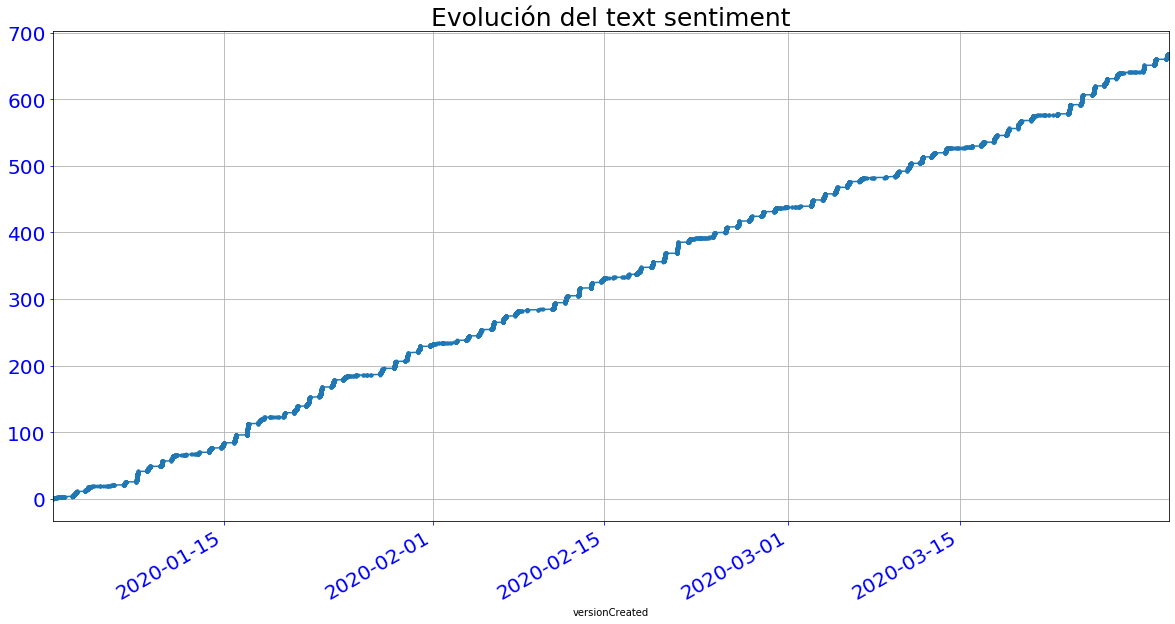

In [22]:
news_df['Polarity'].cumsum().plot(marker='.', figsize=(20,10), label = "Sentiment")
plt.title('Evolución del text sentiment',fontsize=25, color='black')
plt.grid()
plt.tick_params(axis='both', colors='blue', labelsize=20)

Histograma de frecuencias de noticias

Text(0.5, 1.0, 'Histograma de frecuencia ')

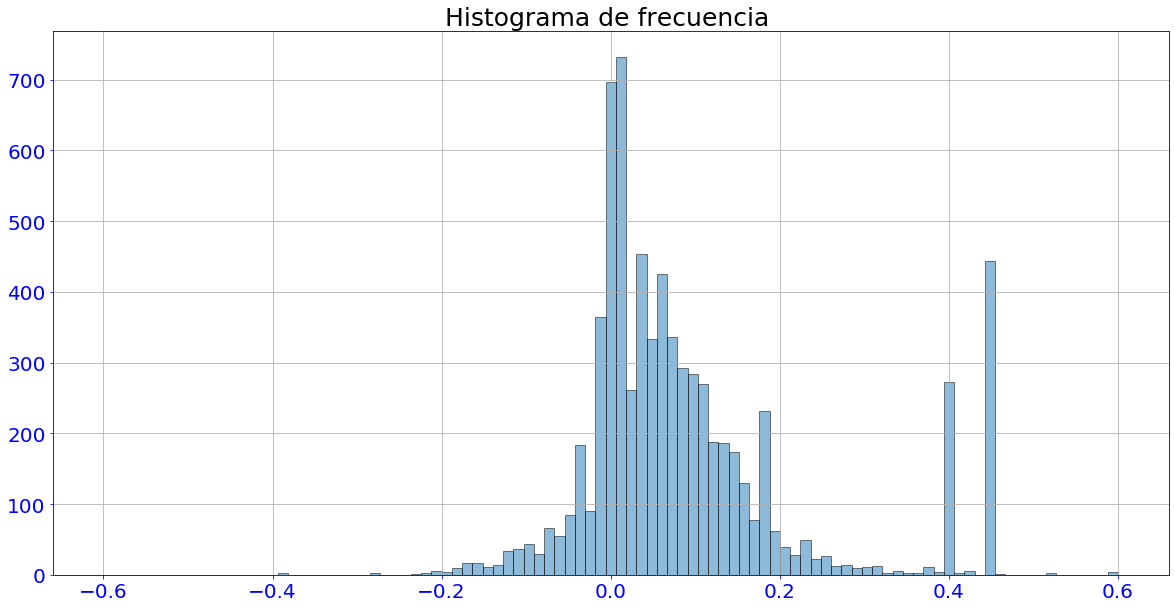

In [23]:
plt.figure(figsize=(20,10))
bins = np.linspace(-0.6,0.6, 100)
plt.grid()
plt.hist(news_df['Polarity'], bins,alpha=0.5, histtype='bar', ec='black')
plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.title('Histograma de frecuencia ',fontsize=25, color='black')

Grafico de Box and Whisker


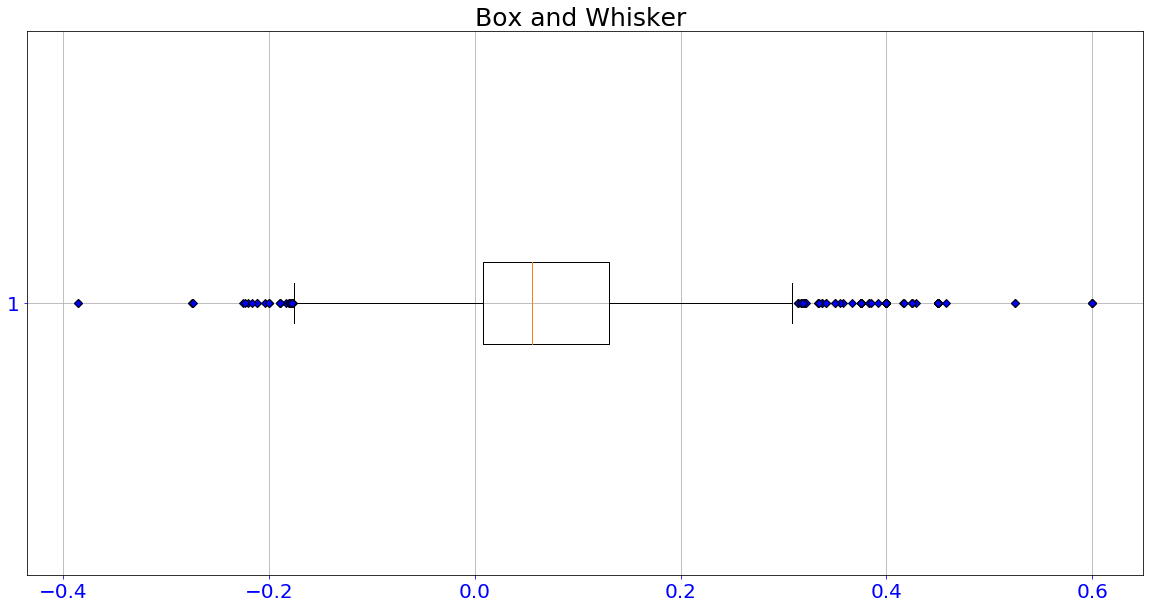

In [24]:
green_diamond = dict(markerfacecolor='b', marker='D')
plt.figure(figsize=(20,10))
plt.boxplot(news_df['Polarity'], flierprops=green_diamond, vert=False)
plt.tick_params(axis='both', colors='blue', labelsize=20)
plt.title('Box and Whisker ',fontsize=25, color='black')
plt.grid()

Veamos cuales son las 100 noticias mas positivas

In [25]:
news_df.sort_values(['Polarity'], ascending=[False]).head(100)

,text,storyId,sourceCode,Score,Polarity
versionCreated,,,,,
2020-02-26 21:48:17.582000+00:00,CGC Caldas Gold upgraded to Tier 1,urn:newsml:reuters.com:20200226:nNRAb2okm4:1,NS:CNSWCH,positive,0.600000
2020-03-24 21:35:04+00:00,"BRIEF-CME Raises Gold, Copper, Soybean Futures...",urn:newsml:reuters.com:20200324:nL4N2BH568:1,NS:RTRS,positive,0.600000
2020-03-24 21:27:26+00:00,CME RAISES SOYBEAN FUTURES (S) MAINTENANCE MAR...,urn:newsml:reuters.com:20200324:nL4N2BH568:3,NS:RTRS,positive,0.600000
2020-03-24 21:22:05+00:00,CME RAISES COMEX 100 GOLD FUTURES (GC) MAINTEN...,urn:newsml:reuters.com:20200324:nL4N2BH568:1,NS:RTRS,positive,0.600000
2020-03-27 17:42:52.963000+00:00,"DJ Gold Ends Day Lower, Gains More Than 9% For...",urn:newsml:reuters.com:20200327:nDJR9VpJKz:2,NS:DJN,positive,0.525000
2020-03-27 18:19:12.781000+00:00,"DJ Update: Gold Ends Day Lower, Gains More Tha...",urn:newsml:reuters.com:20200327:nDJR2LvLfm:2,NS:DJN,positive,0.525000
2020-03-11 23:00:07.526000+00:00,Press Release: Renaissance Announces Director ...,urn:newsml:reuters.com:20200311:nDJRb9sYpW:2,NS:DJN,positive,0.458333
2020-01-28 22:03:37.601000+00:00,*DJ Evolution Mining: Dec Quarter Gold Product...,urn:newsml:reuters.com:20200128:nDJRj4qp3:2,NS:DJN,positive,0.450000
2020-01-08 18:51:33.816000+00:00,*DJ Fitch Rtgs: Gold Miners Should Maintain Ca...,urn:newsml:reuters.com:20200108:nDJR1NkVRH:2,NS:DJN,positive,0.450000


Descarguemos una noticia y leamos el cuerpo

In [26]:
newsText = ek.get_news_story('urn:newsml:reuters.com:20200327:nDJR2LvLfm:2')
soup = BeautifulSoup(newsText,"lxml")
text = soup.get_text()

In [27]:
text

'.storyContent * {border-color:inherit !important;outline-color:inherit !important;}\n  Gold futures finished with a loss on Friday (http://www.marketwatch.com/story/gold-pulls-back-but-set-for-biggest-weekly-gain-since-2008-2020-03-27), but tallied a gain of more than 9% for the week. "The perfect storm for gold is manifesting (http://www.marketwatch.com/story/gold-faces-unique-pricing-supply-and-delivery-challenges-amid-covid-19-shutdowns-2020-03-25) and it is going to keep pushing the gold price higher as capital seeks safe harbor," said Peter Spina, president and chief executive officer at GoldSeek.com. April gold  fell $26.20, or 1.6%, to settle at $1,625 an ounce, but gained 9.5% for the week. \n\n  -Myra P. Saefong \n\n For more from MarketWatch: http://www.marketwatch.com/newsviewer \n\n  (END) Dow Jones Newswires\n\n  March 27, 2020 14:19 ET (18:19 GMT)Copyright (c) 2020 Dow Jones & Company, Inc.'

Nube de palabras

In [28]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [29]:
wordcloud = WordCloud(background_color="white").generate(text)

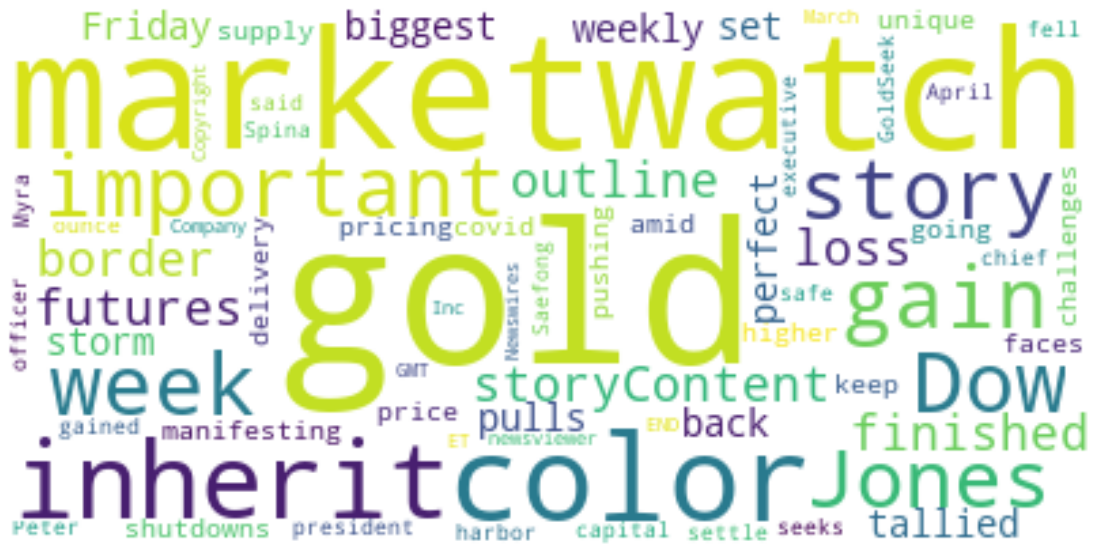

In [30]:
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Veamos las 100 noticias mas negativas

In [31]:
news_df.sort_values(['Polarity'], ascending=[True]).head(100)

,text,storyId,sourceCode,Score,Polarity
versionCreated,,,,,
2020-02-29 00:02:42.322000+00:00,Commodities Gold,urn:newsml:reuters.com:20200229:nNRAb3uf60:1,NS:TELGPH,negative,-0.385714
2020-03-16 23:02:58.637000+00:00,Commodities Week-on-week,urn:newsml:reuters.com:20200316:nNRAb9fqb5:1,NS:TELGPH,negative,-0.385714
2020-01-15 23:21:58.805000+00:00,Joshua Gold Acquires 100% Stake in King Solomo...,urn:newsml:reuters.com:20200115:nNRAap2uwg:1,NS:DATMTR,negative,-0.275000
2020-01-16 23:24:43.953000+00:00,Joshua Gold Acquires 100% Stake in King Solomo...,urn:newsml:reuters.com:20200116:nNRAapg83w:1,NS:DATMTR,negative,-0.275000
2020-01-21 22:00:16.955000+00:00,SKRR SKRR Exploration agreement for Olson prop...,urn:newsml:reuters.com:20200121:nNRAaqsdvw:1,NS:CNSWCH,negative,-0.273571
2020-01-06 23:28:55.892000+00:00,McLaren Resources Raises USD0.02 Million in Pr...,urn:newsml:reuters.com:20200106:nNRAamby37:1,NS:DATMTR,negative,-0.225000
2020-02-25 21:33:31.464000+00:00,Karnataka: 'Swamiji' dupes woman of Rs 27 crore,urn:newsml:reuters.com:20200225:nNRAb29fp2:1,NS:TIMIND,negative,-0.223039
2020-01-15 23:23:33.026000+00:00,Black Tusk Resources to Acquire Chalice Gold E...,urn:newsml:reuters.com:20200115:nNRAap2vnf:1,NS:DATMTR,negative,-0.220000
2020-03-16 21:01:09.603000+00:00,"Closing prices for crude oil, gold and other c...",urn:newsml:reuters.com:20200316:nNRAb9eugl:1,NS:ASSOPR,negative,-0.216667


In [32]:
newsText_n = ek.get_news_story('urn:newsml:reuters.com:20200311:nNRAb7w5o7:1')
soup_n = BeautifulSoup(newsText_n,"lxml")
text_n = soup_n.get_text()

In [33]:
text_n

'.storyContent * {border-color:inherit !important;outline-color:inherit !important;}Benchmark crude oil fell $1.38 to settle at $32.98 a barrel. Brent crude oil, the international standard, fell $1.43 to close at $35.79 a barrel.Wholesale gasoline fell 5 cents to $1.11 per gallon. Heating oil fell 1 cent to $1.24 per gallon. Natural gas fell 6 cents to $1.88 per 1,000 cubic feet.Gold fell $18. to $1,642.30 per ounce, silver fell 18 cents to $16.78 per ounce and copper fell 2 cents to $2.50 per pound.In foreign exchange trading, the dollar fell to 104.56 Japanese yen from 105.14 yen on Tuesday. The euro weakened to $1.1279 from $1.1292.Copyright (c) 2020 AP'

Traducción al Español

In [34]:
from googletrans import Translator

In [35]:
translator = Translator()
print(translator.translate(text_n, dest='es'))

Translated(src=en, dest=es, text=.storyContent * {border-color: hereda importante; contorno color:!! hereda importante;} petróleo crudo de referencia cayó $ 1.38 a situarse en los $ 32.98 el barril. crudo Brent, el estándar internacional, cayó $ 1,43 a cerrar en $ 35.79 una gasolina barrel.Wholesale cayó 5 centavos a $ 1,11 por galón. El combustible de calefacción cayó un 1 por ciento a $ 1,24 por galón. El gas natural cayó 6 centavos a $ 1,88 por 1.000 feet.Gold cúbico cayó de $ 18. a $ 1,642.30 por onza, la plata cayó 18 centavos a $ 16.78 por onza y el cobre cayó 2 centavos a $ 2.50 por el comercio de divisas pound.In, el dólar cayó a 104,56 yenes desde 105,14 yenes el martes. El euro se debilitó a $ 1,1279 desde $ 1.1292.Copyright (c) 2020 AP, pronunciation=None, extra_data="{'translat...")
